In [1]:
import matplotlib.pyplot as plt
import time
import tensorflow as tf

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# Flatten labels
y_train = y_train.flatten()
y_test = y_test.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
# Define a residual block
def residual_block(input_tensor, filters, stride=1):
    x = layers.Conv2D(filters, (3, 3), strides=stride, padding="same", activation="relu")(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, (3, 3), strides=1, padding="same")(x)
    x = layers.BatchNormalization()(x)

    shortcut = input_tensor
    if stride != 1 or input_tensor.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, (1, 1), strides=stride, padding="same")(input_tensor)

    x = layers.add([x, shortcut])
    x = layers.Activation("relu")(x)
    return x

In [4]:
# Build the ResNet-10 model
def build_resnet10(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), strides=1, padding="same", activation="relu")(inputs)
    x = layers.BatchNormalization()(x)

    # Add 10 residual blocks
    for _ in range(5):
        x = residual_block(x, 64)

    for _ in range(5):
        x = residual_block(x, 128, stride=2 if _ == 0 else 1)

    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    return models.Model(inputs, outputs)

In [5]:
# Initialize and compile ResNet-10
resnet10 = build_resnet10()
resnet10.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
start_time = time.time()
# history = resnet10.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))
history = resnet10.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
training_time = time.time() - start_time

# Evaluate the model
final_loss, final_accuracy = resnet10.evaluate(x_test, y_test, verbose=0)

# Print results
print(f"Training Time: {training_time:.2f} seconds")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Accuracy: {final_accuracy:.2f}")

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 47ms/step - accuracy: 0.4550 - loss: 1.5227 - val_accuracy: 0.5373 - val_loss: 1.3772
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 41ms/step - accuracy: 0.7033 - loss: 0.8440 - val_accuracy: 0.6642 - val_loss: 1.0881
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.7814 - loss: 0.6301 - val_accuracy: 0.6376 - val_loss: 1.0900
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.8224 - loss: 0.5155 - val_accuracy: 0.7477 - val_loss: 0.7354
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.8543 - loss: 0.4244 - val_accuracy: 0.8176 - val_loss: 0.5491
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.8821 - loss: 0.3473 - val_accuracy: 0.7975 - val_loss: 0.6262
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 41ms/step - accuracy: 0.9010 - loss: 0.2852 - val_accuracy: 0.7521 - val_loss: 0.8851
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.9179 

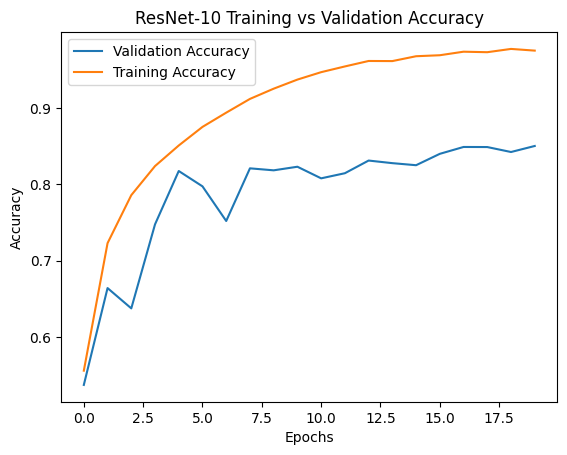

In [6]:
# Compare performance
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ResNet-10 Training vs Validation Accuracy")
plt.legend()
plt.show()